In [15]:
# %load_ext cypher
import networkx as nx
# %load_ext cypher
from IPython.display import display
import pylab
import ipywidgets as widgets
import seaborn as sns
from ipywidgets import interact
# from scripts.vis import draw
from py2neo import Node
import neo4jupyter
neo4jupyter.init_notebook_mode()
import py2neo
from py2neo import Graph
import os
import numpy as np
import glob
from os import listdir
from neo4j.v1 import GraphDatabase
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz
# import networkx as nx

<IPython.core.display.Javascript object>

In [6]:
%matplotlib inline
%matplotlib notebook

In [52]:
#connect to graph database
my_graph = Graph('http://localhost:7474/')

In [53]:
query = """MATCH p = (c:component) - [:includes]-(i:ingredient) where i.name = 'garlic' return c.name"""
data = my_graph.run(query)
for d in data:
    print(d)

('c.name': 'coconut quinoa')
('c.name': 'black bean salad')
('c.name': 'beef stir-fry')
('c.name': 'chicken marinade')
('c.name': 'salmon')
('c.name': 'spicy and sweet sweet potato cubes')
('c.name': 'sofrito')
('c.name': 'tahini sauce')
('c.name': 'sauteed onion and garlic')
('c.name': 'tabouleh')


In [54]:
%%cypher
MATCH (c:component) - [r:includes]-(i:ingredient) where i.name = 'garlic'
return c.name, r.prep_type

10 rows affected.


c.name,r.prep_type
coconut quinoa,grated
black bean salad,grated
beef stir-fry,minced
chicken marinade,minced
salmon,minced
spicy and sweet sweet potato cubes,minced
sofrito,minced
tahini sauce,minced
sauteed onion and garlic,minced
tabouleh,None


In [14]:
results = %cypher MATCH p =  (c:component) - [r:includes]-(i:ingredient) where i.name = 'garlic' return p
# results = %cypher MATCH p =  (c:component) - [r:includes]-(i:ingredient) where i.name = 'garlic' return p
g = results.get_graph()
# g1 = nx.g()
# nx.draw(g,with_labels=True)
labels = dict((n,d['name']) for n,d in g.nodes(data = True))
# nx.draw(g, labels = labels)
g

10 rows affected.


In [12]:
def refreshGraph():
    plt.clf()
    nx.draw_networkx_nodes(T, pos, nodelist=black, node_color='k', node_size=400, alpha=0.8)
    nx.draw_networkx_nodes(T, pos, nodelist=white, node_color='w', node_size=400, alpha=0.8)
    nx.draw_networkx_edges(T,pos,width=1.0, alpha=0.5)
    plt.axis('off')
    plt.axis((-4,4,-1,3))
    fig.patch.set_facecolor('white')
    plt.show()

def onClick(event):
    (x,y)   = (event.xdata, event.ydata)

    for i in allNodes:            
        node = pos[i]
        distance = pow(x-node[0],2)+pow(y-node[1],2)
        if distance < 0.1:
            T.remove_node(i)
            if i in black: black.remove(i)
            if i in white: white.remove(i)
            allNodes.remove(i)
            refreshGraph()

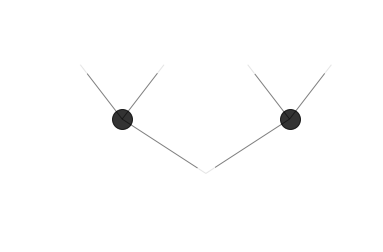

In [13]:
# %matplotlib inline
fig, ax = plt.subplots()
fig.canvas.mpl_connect('button_press_event', onClick)

T = nx.Graph()

### Nodes
white, black = [1, 4, 5, 6, 7], [2, 3]
allNodes = white+black

for node in allNodes:      
    T.add_node(node)
    ### Edges
    T.add_edge(1, 2)
    T.add_edge(1, 3)
    T.add_edge(2, 4)
    T.add_edge(2, 5)
    T.add_edge(3, 6)
    T.add_edge(3, 7)

    ### Positions of the nodes
    pos={}
    pos[1]=np.array([ 0,0])
    pos[2]=np.array([-2,1])
    pos[3]=np.array([ 2,1])
    pos[4]=np.array([-3,2])
    pos[5]=np.array([-1,2])
    pos[6]=np.array([ 1,2])
    pos[7]=np.array([ 3,2])

### Draw nodes and edges
refreshGraph()

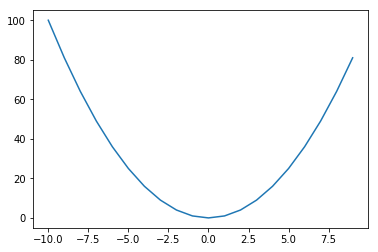

In [16]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

# Simple mouse click function to store coordinates
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata

    print ('x = %d, y = %d'%(ix, iy))

    # assign global variable to access outside of function
    global coords
    coords.append((ix, iy))

    # Disconnect after 2 clicks
    if len(coords) == 2:
        fig.canvas.mpl_disconnect(cid)
        plt.close(1)
    return


x = np.arange(-10,10)
y = x**2

fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(x,y)

coords = []

# Call click func
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()


# # limits for integration
# ch1 = np.where(x == (find_nearest(x, coords[0][0])))
# ch2 = np.where(x == (find_nearest(x, coords[1][0])))

# # Calculate integral
# y_int = trapz(y[ch1[0][0]:ch2[0][0]], x = x[ch1[0][0]:ch2[0][0]])

# print('')
# print('Integral between '+str(coords[0][0])+ ' & ' +str(coords[1][0]))
# print(y_int)

In [17]:
coords

[(-8.2795835907456414, 75.147922155448455),
 (5.6412646768768191, 32.147554237861996)]

In [23]:
from __future__ import print_function

# import matplotlib
%matplotlib inline
#matplotlib.use("WxAgg")
#matplotlib.use("TkAgg")
#matplotlib.use("GTKAgg")
#matplotlib.use("Qt4Agg")
#matplotlib.use("MacOSX")


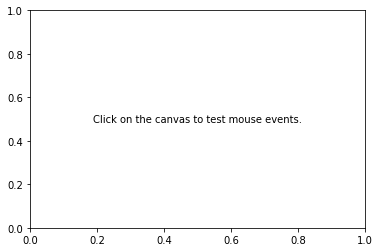

In [24]:
def OnClick(event):
    if event.dblclick:
        print("DBLCLICK", event)
    else:
        print("DOWN    ", event)


def OnRelease(event):
    print("UP      ", event)


fig = plt.gcf()
cid_up = fig.canvas.mpl_connect('button_press_event', OnClick)
cid_down = fig.canvas.mpl_connect('button_release_event', OnRelease)

plt.gca().text(0.5, 0.5, "Click on the canvas to test mouse events.",
               ha="center", va="center")

plt.show()

In [21]:
cid_up

5

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy
import numpy as np


In [3]:
def refreshGraph():
    plt.clf()
    nx.draw_networkx_nodes(T, pos, nodelist=black, node_color='k', node_size=400, alpha=0.8)
    nx.draw_networkx_nodes(T, pos, nodelist=white, node_color='w', node_size=400, alpha=0.8)
    nx.draw_networkx_edges(T,pos,width=1.0, alpha=0.5)
    plt.axis('off')
    plt.axis((-4,4,-1,3))
    fig.patch.set_facecolor('white')
    plt.show()

def onClick(event):
    (x,y)   = (event.xdata, event.ydata)

    for i in allNodes:            
        node = pos[i]
        distance = pow(x-node[0],2)+pow(y-node[1],2)
        if distance < 0.1:
            T.remove_node(i)
            if i in black: black.remove(i)
            if i in white: white.remove(i)
            allNodes.remove(i)
            refreshGraph()


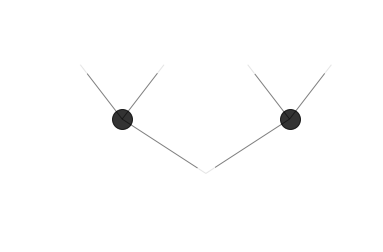

In [12]:
fig, ax = plt.subplots()
fig.canvas.mpl_connect('button_press_event', onClick)

T = nx.Graph()

### Nodes
white, black = [1, 4, 5, 6, 7], [2, 3]
allNodes = white+black

for node in allNodes:      
    T.add_node(node)
    ### Edges
    T.add_edge(1, 2)
    T.add_edge(1, 3)
    T.add_edge(2, 4)
    T.add_edge(2, 5)
    T.add_edge(3, 6)
    T.add_edge(3, 7)

    ### Positions of the nodes
    pos={}
    pos[1]=numpy.array([ 0,0])
    pos[2]=numpy.array([-2,1])
    pos[3]=numpy.array([ 2,1])
    pos[4]=numpy.array([-3,2])
    pos[5]=numpy.array([-1,2])
    pos[6]=numpy.array([ 1,2])
    pos[7]=numpy.array([ 3,2])

### Draw nodes and edges
refreshGraph()